In [1]:
import os
os.chdir('data/')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
airlines_df = pd.read_csv('airlines.csv', header=None, na_values=['\\N', '-', 'NAN'])
airlines_df.columns = ['id', 'name', 'alias', 'iata', 'icao', 'callsign', 'country', 'active']
airlines_df = airlines_df.dropna(subset=['iata'])
airlines_df = airlines_df[airlines_df.active == 'Y'].copy()
airlines_df.name = airlines_df.iata.replace(
    dict(airlines_df.groupby('iata').name.apply(lambda series: series.value_counts().index[0])))
airlines_df.head()

,id,name,alias,iata,icao,callsign,country,active
3,3,1Time Airline,NaN,1T,RNX,NEXTIME,South Africa,Y
10,10,40-Mile Air,NaN,Q5,MLA,MILE-AIR,United States,Y
13,13,Ansett Australia,NaN,AN,AAA,ANSETT,Australia,Y
14,14,Abacus International,NaN,1B,NaN,NaN,Singapore,Y
21,21,Aigle Azur,NaN,ZI,AAF,AIGLE AZUR,France,Y


In [5]:
airports_df = pd.read_csv('airports.csv', header=None, na_values=['\\N'])
airports_df.columns = ['id', 'name', 'city', 'country', 'iata', 'icao', 'latitude', 'longitude', 'altitude', 'timezone', 'dst', 'tz_timezone', 'type', 'data_source']
airports_df.head()

,id,name,city,country,iata,icao,latitude,longitude,altitude,timezone,dst,tz_timezone,type,data_source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10.0,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10.0,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10.0,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10.0,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10.0,U,Pacific/Port_Moresby,airport,OurAirports


In [6]:
european_codes_df = pd.read_csv('european_iatas_df.csv', header=None)
european_codes_df.columns = ['city', 'airport_name', 'iata']
european_codes_df.head()

,city,airport_name,iata
0,Antwerp,Antwerp International Airport,ANR
1,Brussels,Brussels Airport,BRU
2,Brussels,Brussels South Charleroi Airport,CRL
3,Liège,Liège Airport,LGG
4,Ostend,Ostend-Bruges International Airport,OST


In [7]:
european_iatas = european_codes_df.iata.str.strip().tolist()
print(european_iatas)

['ANR', 'BRU', 'CRL', 'LGG', 'OST', 'AJA', 'BIA', 'BVA', 'EGC', 'BZR', 'BIQ', 'BOD', 'BES', 'CCF', 'XCR', 'CMF', 'DNR', 'FSC', 'GNB', 'LRH', 'LIL', 'LIG', 'LYS', 'MRS', 'BSL', 'NTE', 'NCE', 'FNI', 'CDG', 'ORY', 'PUF', 'PGF', 'PIS', 'RDZ', 'EBU', 'SXB', 'TLN', 'TLS', 'TUF', 'GIB', 'GCI', 'JER', 'ORK', 'DUB', 'KIR', 'NOC', 'SNN', 'IOM', 'LUX', 'AMS', 'EIN', 'GRQ', 'MST', 'RTM', 'BYJ', 'FAO', 'FNC', 'PXO', 'LIS', 'OPO', 'PDL', 'TER', 'LCG', 'ALC', 'LEI', 'OVD', 'BCN', 'FUE', 'GRO', 'LPA', 'GRX', 'HSK', 'IBZ', 'XRY', 'SPC', 'ACE', 'ILD', 'MAD', 'AGP', 'MAH', 'MJV', 'PMI', 'REU', 'SDR', 'SCQ', 'SVQ', 'TFN', 'TFS', 'VLC', 'VLL', 'ZAZ', 'GRZ', 'KLU', 'INN', 'LNZ', 'SZG', 'VIE', 'FKB', 'TXL', 'SXF', 'BER', 'BRE', 'CGN', 'DTM', 'DUS', 'FRA', 'HHN', 'MLH', 'BSL', 'EAP', 'FDH', 'HAM', 'HAJ', 'LEJ', 'LBC', 'FMM', 'MUC', 'NUE', 'STR', 'NRN', 'ATH', 'CHQ', 'JKH', 'CFU', 'HER', 'KLX', 'AOK', 'KVA', 'EFL', 'KGS', 'JMK', 'MJT', 'PVK', 'RHO', 'SMI', 'JTR', 'JSI', 'SKU', 'SKG', 'VOL', 'ZTH', 'AHO', 'AOI'

In [8]:
european_airports_df = airports_df[airports_df.iata.isin(european_iatas)].copy()
european_airports_df.head()

,id,name,city,country,iata,icao,latitude,longitude,altitude,timezone,dst,tz_timezone,type,data_source
10,11,Akureyri Airport,Akureyri,Iceland,AEY,BIAR,65.660004,-18.072701,6,0.0,N,Atlantic/Reykjavik,airport,OurAirports
15,16,Keflavik International Airport,Keflavik,Iceland,KEF,BIKF,63.985001,-22.605600,171,0.0,N,Atlantic/Reykjavik,airport,OurAirports
17,18,Reykjavik Airport,Reykjavik,Iceland,RKV,BIRK,64.129997,-21.940599,48,0.0,N,Atlantic/Reykjavik,airport,OurAirports
296,299,Antwerp International Airport (Deurne),Antwerp,Belgium,ANR,EBAW,51.189400,4.460280,39,1.0,E,Europe/Brussels,airport,OurAirports
299,302,Brussels Airport,Brussels,Belgium,BRU,EBBR,50.901402,4.484440,184,1.0,E,Europe/Brussels,airport,OurAirports


In [9]:
routes_df = pd.read_csv('routes.csv', header=None, na_values=['\\N'])
routes_df.columns = ['airline', 'airline_id', 'src', 'src_id', 'dest', 'dest_id', 'codeshare', 'stops', 'equipment']

routes_df['src_iata'] = routes_df.src.apply(lambda code: code if len(code) == 3 else np.nan)
routes_df['src_icao'] = routes_df.src.apply(lambda code: code if len(code) == 4 else np.nan)

routes_df['dest_iata'] = routes_df.dest.apply(lambda code: code if len(code) == 3 else np.nan)
routes_df['dest_icao'] = routes_df.dest.apply(lambda code: code if len(code) == 4 else np.nan)

print('Is "src" field containing only IATA codes? {}'.format(routes_df.src_iata.isna().sum() == 0))
print('Is "dest" field containing only IATA codes? {}'.format(routes_df.dest_iata.isna().sum() == 0))

routes_df.head()

Is "src" field containing only IATA codes? True
Is "dest" field containing only IATA codes? True


,airline,airline_id,src,src_id,dest,dest_id,codeshare,stops,equipment,src_iata,src_icao,dest_iata,dest_icao
0,2B,410.0,AER,2965.0,KZN,2990.0,NaN,0,CR2,AER,NaN,KZN,NaN
1,2B,410.0,ASF,2966.0,KZN,2990.0,NaN,0,CR2,ASF,NaN,KZN,NaN
2,2B,410.0,ASF,2966.0,MRV,2962.0,NaN,0,CR2,ASF,NaN,MRV,NaN
3,2B,410.0,CEK,2968.0,KZN,2990.0,NaN,0,CR2,CEK,NaN,KZN,NaN
4,2B,410.0,CEK,2968.0,OVB,4078.0,NaN,0,CR2,CEK,NaN,OVB,NaN


In [26]:
european_routes_df = routes_df[routes_df.src_iata.isin(european_iatas) & routes_df.dest_iata.isin(european_iatas)].copy()
european_routes_df.head()

,airline,airline_id,src,src_id,dest,dest_id,codeshare,stops,equipment,src_iata,src_icao,dest_iata,dest_icao
0,2B,410.0,AER,2965.0,KZN,2990.0,NaN,0,CR2,AER,NaN,KZN,NaN
1,2B,410.0,ASF,2966.0,KZN,2990.0,NaN,0,CR2,ASF,NaN,KZN,NaN
2,2B,410.0,ASF,2966.0,MRV,2962.0,NaN,0,CR2,ASF,NaN,MRV,NaN
3,2B,410.0,CEK,2968.0,KZN,2990.0,NaN,0,CR2,CEK,NaN,KZN,NaN
4,2B,410.0,CEK,2968.0,OVB,4078.0,NaN,0,CR2,CEK,NaN,OVB,NaN


In [27]:
european_routes_df_lite = (
    european_routes_df.copy()
    .join(
        airlines_df.set_index('id').name.rename('airline_name'), 
        on='airline_id')
    .join(
        european_codes_df.set_index('iata').city.rename('src_city'),
        on='src_iata')
    .join(
        european_codes_df.set_index('iata').city.rename('dest_city'),
        on='dest_iata')
    .join(
        airports_df.set_index('iata').country.rename('src_country'), 
        on='src_iata')
    .join(
        airports_df.set_index('iata').country.rename('dest_country'), 
        on='dest_iata')
    .reindex(columns=['src_iata', 'src_city', 'src_country', 'dest_iata', 'dest_city', 'dest_country', 'airline_name'])
    .dropna(subset=['airline_name']))

european_routes_df_lite.head()

,src_iata,src_city,src_country,dest_iata,dest_city,dest_country,airline_name
0,AER,Sochi,Russia,KZN,Kazan,Russia,Aerocondor
1,ASF,Astrakhan,Russia,KZN,Kazan,Russia,Aerocondor
2,ASF,Astrakhan,Russia,MRV,Mineralnye Vody,Russia,Aerocondor
3,CEK,Chelyabinsk,Russia,KZN,Kazan,Russia,Aerocondor
4,CEK,Chelyabinsk,Russia,OVB,Novosibirsk,Russia,Aerocondor


In [28]:
european_routes_df_lite['connection_iata'] = (
    european_routes_df_lite[['src_iata', 'dest_iata']].copy()
    .apply(lambda r: '_'.join(sorted(r)), 
           axis=1))
    
european_routes_df_lite.head()

,src_iata,src_city,src_country,dest_iata,dest_city,dest_country,airline_name,connection_iata
0,AER,Sochi,Russia,KZN,Kazan,Russia,Aerocondor,AER_KZN
1,ASF,Astrakhan,Russia,KZN,Kazan,Russia,Aerocondor,ASF_KZN
2,ASF,Astrakhan,Russia,MRV,Mineralnye Vody,Russia,Aerocondor,ASF_MRV
3,CEK,Chelyabinsk,Russia,KZN,Kazan,Russia,Aerocondor,CEK_KZN
4,CEK,Chelyabinsk,Russia,OVB,Novosibirsk,Russia,Aerocondor,CEK_OVB


## Exclusive Connections

In [31]:
connections_df = (
    european_routes_df_lite
    .groupby(['connection_iata'])
    .airline_name
    .agg({'n_airlines': pd.Series.nunique, 
          'airlines_names': pd.Series.unique}))

connections_df.head()

C:\Users\Massimiliano.Russo\AppData\Local\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,n_airlines,airlines_names
connection_iata,,
AAL_AAR,1,British Airways
AAL_AGP,1,Norwegian Air Shuttle
AAL_ALC,1,Norwegian Air Shuttle
AAL_AMS,2,"[Alitalia, KLM Royal Dutch Airlines]"
AAL_ARN,1,Scandinavian Airlines System


In [33]:
n_connections = european_routes_df_lite.groupby(['airline_name']).connection_iata.nunique()
n_connections.head()

airline_name
ABSA - Aerolinhas Brasileiras     1
Adria Airways                    20
Aegean Airlines                  88
Aer Lingus                       99
AeroMéxico                        4
Name: connection_iata, dtype: int64

In [34]:
# the exclusive connections are those served by only one airline
exclusive_connections_df = connections_df[connections_df.n_airlines == 1].copy()

# extract the connected iatas from the index
exclusive_connections_df[['iata_A', 'iata_B']] = (
    exclusive_connections_df
    .index.to_series()
    .apply(lambda s: pd.Series(s.split('_'))))

# use the iatas to append the correposnding cities
exclusive_connections_df = (
    exclusive_connections_df
    .join(
        airports_df.set_index('iata').city.rename('city_A'),
        on='iata_A')
    .join(
        airports_df.set_index('iata').city.rename('city_B'),
        on='iata_B'))
    
exclusive_connections_df.head()

,n_airlines,airlines_names,iata_A,iata_B,city_A,city_B
connection_iata,,,,,,
AAL_AAR,1,British Airways,AAL,AAR,Aalborg,Aarhus
AAL_AGP,1,Norwegian Air Shuttle,AAL,AGP,Aalborg,Malaga
AAL_ALC,1,Norwegian Air Shuttle,AAL,ALC,Aalborg,Alicante
AAL_ARN,1,Scandinavian Airlines System,AAL,ARN,Aalborg,Stockholm
AAL_LGW,1,Norwegian Air Shuttle,AAL,LGW,Aalborg,London


In [36]:
# select Ryanair exclusive connections
print(exclusive_connections_df[exclusive_connections_df.airlines_names == 'Ryanair'][['city_A', 'city_B']].values)

[['Aarhus' 'Malaga']
 ['Aarhus' 'Palma de Mallorca']
 ['Aarhus' 'London']
 ...
 ['Trapani' 'Warsaw']
 ['Ronchi De Legionari' 'Valencia']
 ['Warsaw' 'Wroclaw']]


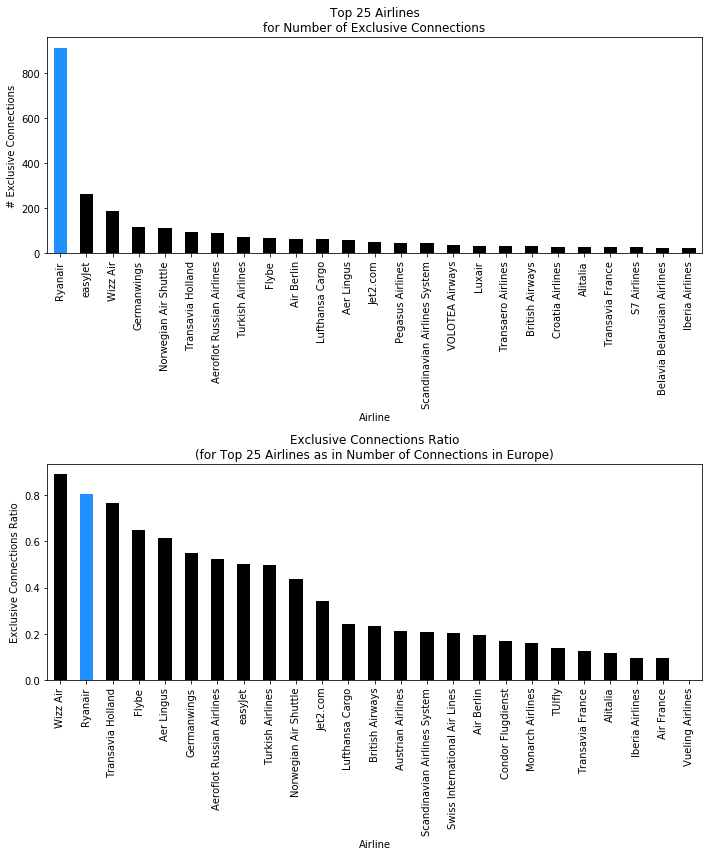

In [37]:
fig, (ax,ax1) = plt.subplots(2,1,facecolor='w', figsize=(10,12))

n_exclusive_connections = (
    exclusive_connections_df
    .groupby('airlines_names').size()
    .sort_values(ascending=False))

(n_exclusive_connections.iloc[:25].plot(
    kind='bar', 
    color=['k' if name != 'Ryanair' else 'dodgerblue' for name in n_exclusive_connections.index.tolist()], 
    ax=ax))


exclusive_connections_ratio = ((n_exclusive_connections / n_connections)
 .dropna()
 .reindex(n_connections.sort_values(ascending=False).iloc[:25].index.tolist(), fill_value=0)
).sort_values(ascending=False)

exclusive_connections_ratio.plot(
    kind='bar', 
    color=['k' if name != 'Ryanair' else 'dodgerblue' for name in exclusive_connections_ratio.index.tolist()], 
    ax=ax1)

ax.set_title('Top 25 Airlines\nfor Number of Exclusive Connections')
ax.set_xlabel('Airline')
#ax.set_xticklabels(exclusive_connections_ratio.index.map(lambda s: s[:10] + '.'*(len(s)>10)))
ax.set_ylabel('# Exclusive Connections')

ax1.set_title('Exclusive Connections Ratio\n(for Top 25 Airlines as in Number of Connections in Europe)')
ax1.set_xlabel('Airline')
ax1.set_ylabel('Exclusive Connections Ratio')

plt.tight_layout()
plt.show()

## Presence

In [38]:
airlines_presence_stats = (
    european_routes_df_lite.copy()
    .groupby(['src_iata', 'airline_name']).size()
    .groupby('src_iata').apply(lambda g: g / g.sum())
    .reset_index(0,drop=True)
    .groupby('airline_name')
    .agg(['mean', 'median', 'min', 'max', 'count'])
    .applymap(lambda v: round(v,2)))

airlines_presence_stats.head()

,mean,median,min,max,count
airline_name,,,,,
ABSA - Aerolinhas Brasileiras,0.03,0.03,0.01,0.05,2
Adria Airways,0.05,0.01,0.00,0.52,18
Aegean Airlines,0.08,0.02,0.00,0.50,57
Aer Lingus,0.04,0.01,0.00,0.59,71
AeroMéxico,0.01,0.01,0.01,0.01,4


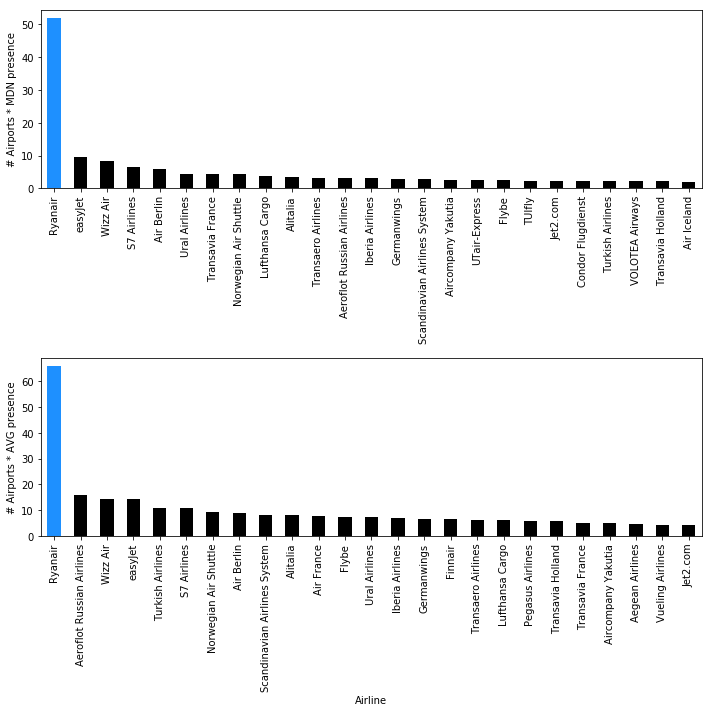

In [40]:
fig, (ax,ax1) = plt.subplots(2,1, figsize=(10,10), facecolor='w')

mdn_presence = (
    (airlines_presence_stats['count'] * airlines_presence_stats['median'])
    .sort_values(ascending=False))

avg_presence = (
    (airlines_presence_stats['count'] * airlines_presence_stats['mean'])
    .sort_values(ascending=False))
    
(mdn_presence.iloc[:25]
 .plot(kind='bar', color=['dodgerblue'] + 24*['k'], ax=ax))

(avg_presence.iloc[:25]
 .plot(kind='bar', color=['dodgerblue'] + 24*['k'], ax=ax1))

ax.set_ylabel('# Airports * MDN presence')
ax1.set_ylabel('# Airports * AVG presence')

ax.set_xlabel('')
ax1.set_xlabel('Airline')

plt.tight_layout()
plt.show()